## ✅ 문제
## 1) 코딩
1. timestamp를 datetime으로 변환하고, 시간 순으로 정렬한 df2를 만들어라. (원본 df 변경 ❌)
2. 각 행에 대해 signed_qty를 만들어라.
* event가 "buy"면 +qty
* event가 "sell"이면 -qty
3. position 컬럼을 만들어라.
* position = signed_qty의 누적합 (cumsum)
4. cashflow 컬럼을 만들어라.
* buy면 - qty * price
* sell이면 + qty * price
5. pnl 컬럼을 만들어라.
* pnl = cashflow의 누적합 (cumsum)
## 2) 분석
6. position이 0이 되는 시점(=포지션이 청산된 시점)의 행만 골라서  
그 행들의 timestamp를 Python list로 만들어 flat_times에 저장하라.
## 3) 시각화 (조건 그대로)
### Figure 1: position line plot
* figure size: (7, 3)
* x축: timestamp
* y축: position
* 선 스타일: 기본(line)
* marker: o
* title: "Position Over Time"
* xlabel: "Time"
* ylabel: "Position"
* grid: 표시 ✅
* legend: 표시 ❌ (절대 넣지 말 것)
* flat_times에 해당하는 시점에는
** 검은색 점(marker='o')을 추가로 표시할 것 (기존 점 말고 덧그리기)
** 점 크기(size) = 80
### Figure 2: pnl line plot
* figure size: (7, 3)
* x축: timestamp
* y축: pnl
* 선 스타일: 기본(line)
* marker: o
* title: "Cumulative PnL Over Time"
* xlabel: "Time"
* ylabel: "PnL"
* grid: 표시 ✅
* legend: 표시 ❌
* pnl의 최댓값 지점에 텍스트로
** "MAX" 라고 표시할 것 (plt.text 사용)
** 텍스트는 점의 오른쪽에 살짝 붙여 표시할 것 (x는 해당 timestamp, y는 해당 pnl)
## 조건
* pandas + matplotlib만 사용
* for-loop ❌
* groupby/rolling/pivot/interpolate/diff 사용 ❌ (이번 문제에서는 금지)

In [2]:
import pandas as pd

df = pd.DataFrame({
    "timestamp": [
        "2025-12-20 09:00", "2025-12-20 09:30", "2025-12-20 10:00",
        "2025-12-20 10:30", "2025-12-20 11:00", "2025-12-20 11:30",
        "2025-12-20 12:00"
    ],
    "event": ["buy","buy","sell","buy","sell","sell","buy"],
    "qty":   [  10,   5,    8,   7,    4,    6,   3],
    "price": [ 100, 102,  101, 103,  104,  102, 105]
})
display(df)

,timestamp,event,qty,price
0,2025-12-20 09:00,buy,10,100
1,2025-12-20 09:30,buy,5,102
2,2025-12-20 10:00,sell,8,101
3,2025-12-20 10:30,buy,7,103
4,2025-12-20 11:00,sell,4,104
5,2025-12-20 11:30,sell,6,102
6,2025-12-20 12:00,buy,3,105


In [41]:
# timestamp를 datetime으로 변환하고, 시간 순으로 정렬한 df2를 만들어라. (원본 df 변경 ❌)
df2 = df.copy()
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.sort_values(by='timestamp')
display(df2)

,timestamp,event,qty,price
0,2025-12-20 09:00:00,buy,10,100
1,2025-12-20 09:30:00,buy,5,102
2,2025-12-20 10:00:00,sell,8,101
3,2025-12-20 10:30:00,buy,7,103
4,2025-12-20 11:00:00,sell,4,104
5,2025-12-20 11:30:00,sell,6,102
6,2025-12-20 12:00:00,buy,3,105


In [42]:
# 각 행에 대해 signed_qty를 만들어라.
# event가 "buy"면 +qty
# event가 "sell"이면 -qty
df2['signed_qty'] = df2.apply(lambda x : x['qty'] if x['event']=='buy' else -x['qty'], axis=1)
display(df2)

,timestamp,event,qty,price,signed_qty
0,2025-12-20 09:00:00,buy,10,100,10
1,2025-12-20 09:30:00,buy,5,102,5
2,2025-12-20 10:00:00,sell,8,101,-8
3,2025-12-20 10:30:00,buy,7,103,7
4,2025-12-20 11:00:00,sell,4,104,-4
5,2025-12-20 11:30:00,sell,6,102,-6
6,2025-12-20 12:00:00,buy,3,105,3


In [43]:
# position 컬럼을 만들어라.
# position = signed_qty의 누적합 (cumsum)
df2['position'] = df2['signed_qty'].cumsum()
display(df2)

,timestamp,event,qty,price,signed_qty,position
0,2025-12-20 09:00:00,buy,10,100,10,10
1,2025-12-20 09:30:00,buy,5,102,5,15
2,2025-12-20 10:00:00,sell,8,101,-8,7
3,2025-12-20 10:30:00,buy,7,103,7,14
4,2025-12-20 11:00:00,sell,4,104,-4,10
5,2025-12-20 11:30:00,sell,6,102,-6,4
6,2025-12-20 12:00:00,buy,3,105,3,7


In [44]:
# cashflow 컬럼을 만들어라.
# buy면 - qty * price
# sell이면 + qty * price
df2['cashflow']= df2.apply(lambda x : -x['qty']*x['price'] if x['event']=='buy' else x['qty']*x['price'], axis=1)
display(df2)

,timestamp,event,qty,price,signed_qty,position,cashflow
0,2025-12-20 09:00:00,buy,10,100,10,10,-1000
1,2025-12-20 09:30:00,buy,5,102,5,15,-510
2,2025-12-20 10:00:00,sell,8,101,-8,7,808
3,2025-12-20 10:30:00,buy,7,103,7,14,-721
4,2025-12-20 11:00:00,sell,4,104,-4,10,416
5,2025-12-20 11:30:00,sell,6,102,-6,4,612
6,2025-12-20 12:00:00,buy,3,105,3,7,-315


In [45]:
# pnl 컬럼을 만들어라.
# pnl = cashflow의 누적합 (cumsum)
df2['pnl']= df2['cashflow'].cumsum()
display(df2)

,timestamp,event,qty,price,signed_qty,position,cashflow,pnl
0,2025-12-20 09:00:00,buy,10,100,10,10,-1000,-1000
1,2025-12-20 09:30:00,buy,5,102,5,15,-510,-1510
2,2025-12-20 10:00:00,sell,8,101,-8,7,808,-702
3,2025-12-20 10:30:00,buy,7,103,7,14,-721,-1423
4,2025-12-20 11:00:00,sell,4,104,-4,10,416,-1007
5,2025-12-20 11:30:00,sell,6,102,-6,4,612,-395
6,2025-12-20 12:00:00,buy,3,105,3,7,-315,-710


In [46]:
flat_times = df2[df2['position']==0]['timestamp'].to_list()
flat_times

[]

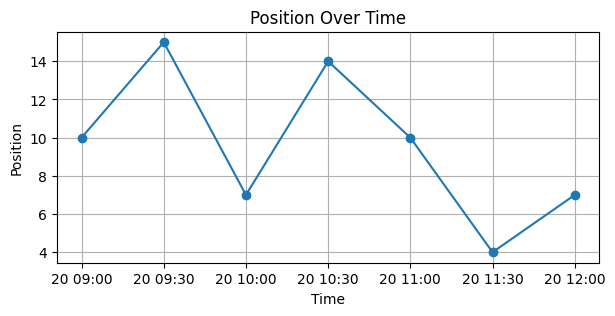

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,3))
plt.plot(df2['timestamp'],df2['position'], marker = 'o' )
# plt.plot(df2[df2['timestamp'].isin(flat_times)]['timestamp'], df2[df2['timestamp'].isin(flat_times)]['position'], marker = 'o', markersize=80 )
plt.scatter(df2[df2['timestamp'].isin(flat_times)]['timestamp'], df2[df2['timestamp'].isin(flat_times)]['position'], s=80, color='black')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title("Position Over Time")
plt.grid(True)


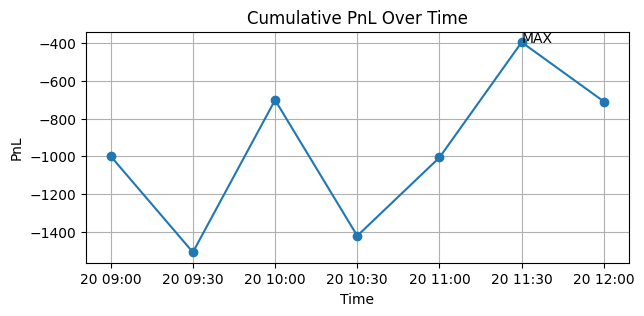

In [48]:
plt.figure(figsize = (7,3))
plt.plot(df2['timestamp'],df2['pnl'], marker = 'o' )
plt.text(df2['timestamp'][df2['pnl'].idxmax()], df2['pnl'][df2['pnl'].idxmax()], 'MAX')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.title("Cumulative PnL Over Time")
plt.grid(True)